## UNBALANCED playground

In [3]:
import numpy as np
from utils.Visualizations import *
import ot

n_p = 100
n_q = 100
X,Y = np.linspace(0,1,n_p), np.linspace(0,1,n_q)

p = make_1D_gauss(n_p, np.floor(1 * n_p / 4.), 2.) + make_1D_gauss(n_p, np.floor(2 * n_p / 4.), 2.) * (0.5)
q = make_1D_gauss(n_q, np.floor(5 * n_q / 8.), 2.)

C = np.zeros([n_p,n_q],dtype=np.float64)

dist_f1 = lambda a,b : abs(a-b)
dist_f2 = lambda a,b : (a-b)**2
for it1 in range(n_p):
    for it2 in range(n_q):
        C[it1,it2] = dist_f2(X[it1],Y[it2])

### eps = 1e-3

c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


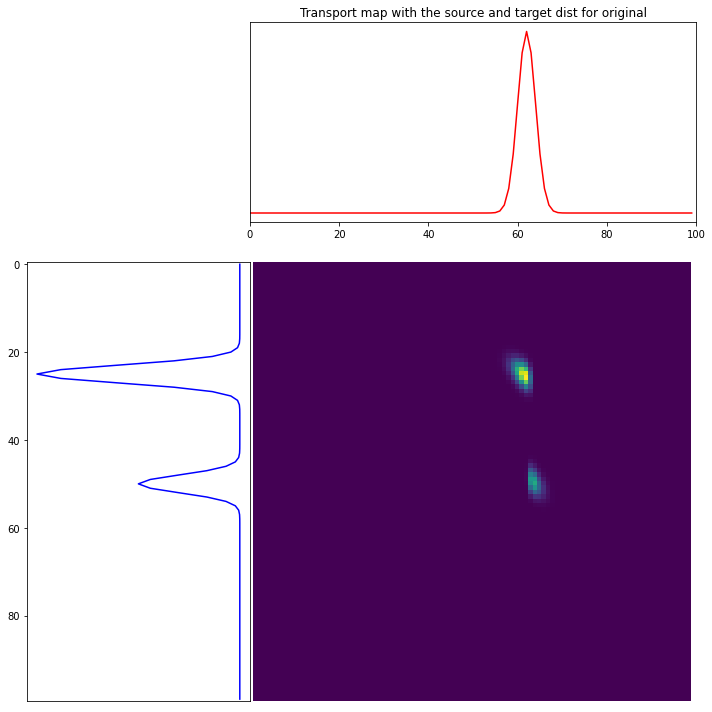

In [4]:
eps = 1.e-3
transport_plan, transport_cost, _, _ = calc_transport_pot_sinkhorn(p, q, C, eps)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

### eps = 1e-4

c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:485: RuntimeWarning: divide by zero encountered in divide
  u = 1. / nx.dot(Kp, v)
c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:485: RuntimeWarning: overflow encountered in divide
  u = 1. / nx.dot(Kp, v)
c:\users\eriki\appdata\local\programs\python\python38\lib\site-packages\ot\bregman.py:492: UserWarning: Warning: numerical errors at iteration 2
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


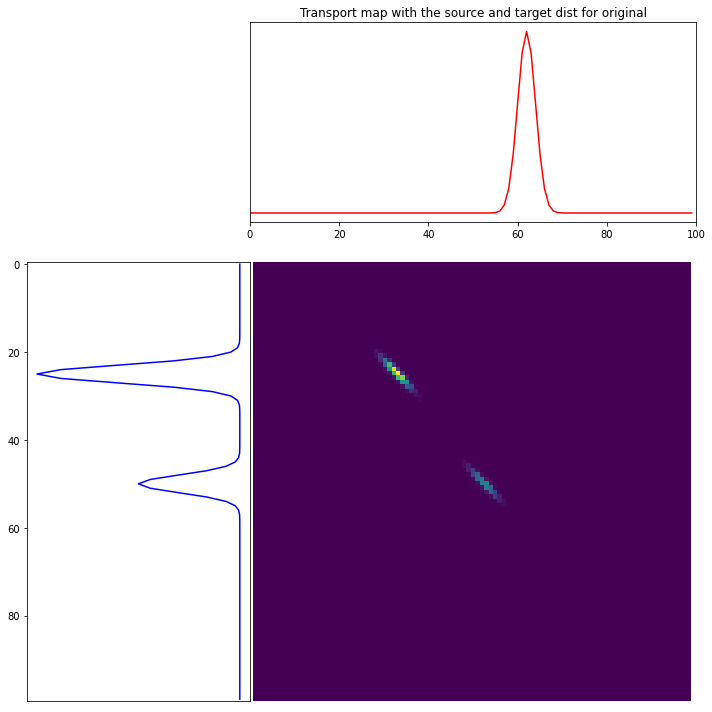

In [5]:
eps = 1.e-4
transport_plan, transport_cost, _, _ = calc_transport_pot_sinkhorn(p, q, C, eps)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

## My implementation of sinkhorn according to https://arxiv.org/pdf/2211.08775.pdf

### eps = 1e-2

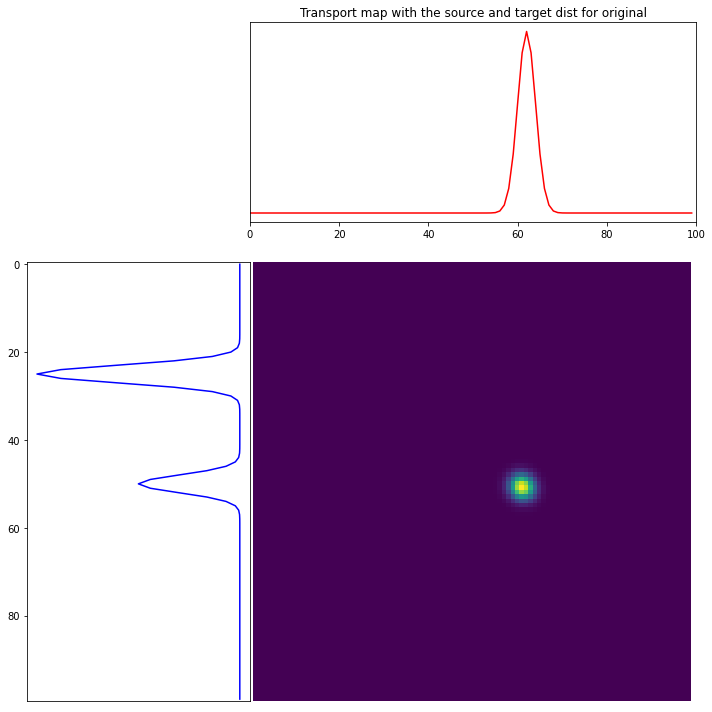

In [6]:
eps = 1.e-2
_, _, transport_plan = unbalanced_sinkhorn(p, q, C, eps, return_plan=True)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

### eps = 1e-4

C:\Users\eriki\Documents\school\Thesis\Optimal_transport_playground\utils\utils.py:526: RuntimeWarning: overflow encountered in exp
  plan[i, j] = np.exp((f[i] + g[j] - costs[i, j]) / eps) * alpha[i] * beta[j]


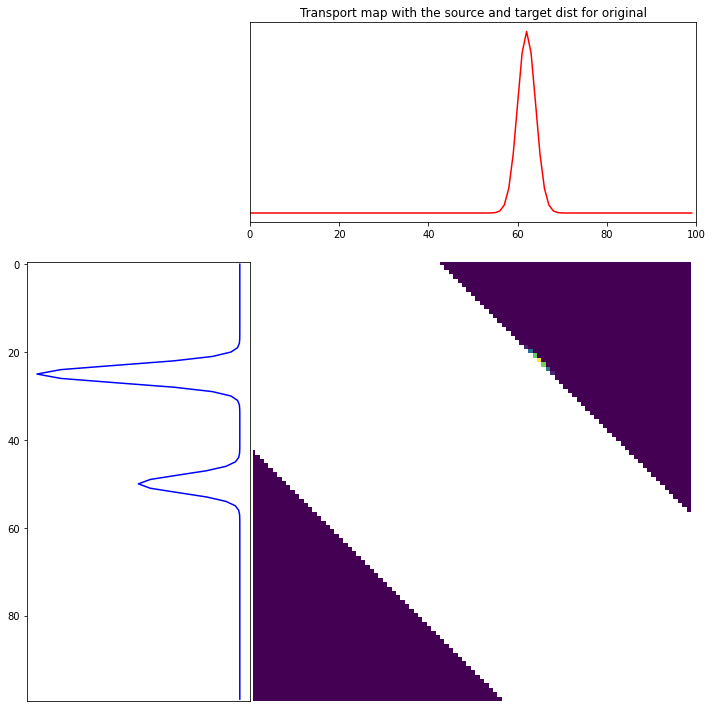

In [7]:
eps = 1.e-4
_, _, transport_plan = unbalanced_sinkhorn(p, q, C, eps, return_plan=True)
plt.figure(figsize=(10,10))
plot1D_mat(p, q, transport_plan,'Transport map with the source and target dist for original')
plt.show()

We can see that we simply got a diagonal line for epsilon which is too small, this happens because having a small epsilon makes us "divide by zero" and therefore get the trivial solution which is a constant diagonal vector.